## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")


## Importing Dataset

In [2]:
df = pd.read_excel(r'C:\Users\BOT-PC\Text Summarization Capstone Project\projectdatanew.xlsx')

## Exploratory Data Analysis

In [3]:
df.head()

,Name,new_objective_extracted,new_strategy_extracted,ticker,prospectus_link,Target Variable
0,iShares msci germany etf,The iShares MSCI Germany ETF (the “Fund”) see...,The Fund seeks to track the investment results...,EWG,https://www.sec.gov/Archives/edgar/data/930667...,Medium Risk
1,iShares msci mexico etf,The iShares MSCI Mexico ETF (the “Fund”) seek...,The Fund seeks to track the investment results...,EWW,https://www.sec.gov/Archives/edgar/data/930667...,High Risk
2,Fidelity® Cash Central Fund,Fidelity® Cash Central Fund seeks to obtain a ...,The Adviser invests the fund's assets in U.S. ...,NaN,https://www.sec.gov/Archives/edgar/data/102269...,Low Risk
3,iShares msci malaysia etf,The iShares MSCI Malaysia ETF (the “Fund”) se...,The Fund seeks to track the investment resul...,EWM,https://www.sec.gov/Archives/edgar/data/930667...,High Risk
4,iShares msci malaysia etf,The iShares MSCI Malaysia ETF (the “Fund”) se...,The Fund seeks to track the investment results...,EWM,https://www.sec.gov/Archives/edgar/data/930667...,High Risk


In [4]:
df['new_strategy_extracted'][0]

"The Fund seeks to track the investment results of the MSCI Germany Index (the “Underlying Index”), which consists of stocks traded primarily on the Frankfurt Stock Exchange. The Underlying Index may include large-, mid- or small-capitalization companies. Components of the Underlying Index primarily include consumer discretionary, financials and healthcare companies. The components of the Underlying Index, and the degree to which these components represent certain industries, are likely to change over time.\nBFA uses a “passive” or indexing approach to try to achieve the Fund’s investment objective. Unlike many investment companies, the Fund does not try to “beat” the index it tracks and does not seek temporary defensive positions when markets decline or appear overvalued.\nIndexing may eliminate the chance that the Fund will substantially outperform the Underlying Index but also may reduce some of the risks of active management, such as poor security selection. Indexing seeks to achie

In [5]:
df = df[pd.notnull(df['new_strategy_extracted'])]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 6 columns):
Name                       224 non-null object
new_objective_extracted    224 non-null object
new_strategy_extracted     224 non-null object
ticker                     211 non-null object
prospectus_link            224 non-null object
Target Variable            224 non-null object
dtypes: object(6)
memory usage: 12.2+ KB


## Selecting Meaningful Features

In [7]:
col = ['Target Variable', 'new_strategy_extracted']
df = df[col]

In [8]:
df.columns

Index(['Target Variable', 'new_strategy_extracted'], dtype='object')

In [9]:
df.columns = ['target_variable', 'new_strategy_extracted']

In [10]:
df.head()

,target_variable,new_strategy_extracted
0,Medium Risk,The Fund seeks to track the investment results...
1,High Risk,The Fund seeks to track the investment results...
2,Low Risk,The Adviser invests the fund's assets in U.S. ...
3,High Risk,The Fund seeks to track the investment resul...
4,High Risk,The Fund seeks to track the investment results...


In [11]:
df['category_id'] = df['target_variable'].factorize()[0]
from io import StringIO
category_id_df = df[['target_variable', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'target_variable']].values)

In [12]:
df.head()

,target_variable,new_strategy_extracted,category_id
0,Medium Risk,The Fund seeks to track the investment results...,0
1,High Risk,The Fund seeks to track the investment results...,1
2,Low Risk,The Adviser invests the fund's assets in U.S. ...,2
3,High Risk,The Fund seeks to track the investment resul...,1
4,High Risk,The Fund seeks to track the investment results...,1



# Frequency Count of Target Variable

In [13]:
from collections import Counter
Counter(df["target_variable"])

Counter({'Medium Risk': 159, 'High Risk': 44, 'Low Risk': 21})

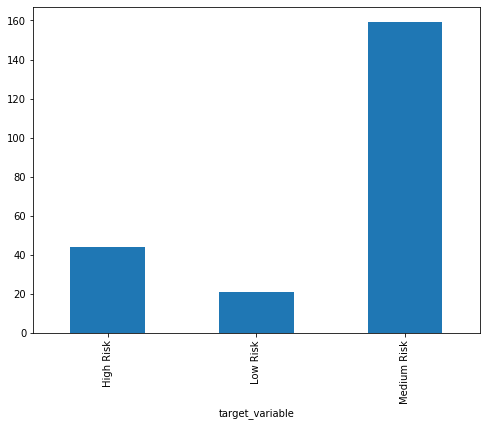

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('target_variable').new_strategy_extracted.count().plot.bar(ylim=0)

# Data Cleaning

In [18]:
import re 
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()
X = []
for i in range(df.shape[0]):
    X.append(clean_str(df.iloc[i][1]))
y = np.array(df["category_id"])

In [21]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

# Tokenization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(X).toarray()
labels = df.category_id
features.shape

(224, 2190)

In [22]:
df.head()

,target_variable,new_strategy_extracted,category_id
0,Medium Risk,The Fund seeks to track the investment results...,0
1,High Risk,The Fund seeks to track the investment results...,1
2,Low Risk,The Adviser invests the fund's assets in U.S. ...,2
3,High Risk,The Fund seeks to track the investment resul...,1
4,High Risk,The Fund seeks to track the investment results...,1
